In [91]:
!pip install wikipedia
     

from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import seaborn as sns
     

nx.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'2.8.8'

In [92]:
!pip install scipy==1.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
SEED = "Stable Diffusion".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier", 
         "Pubmed Central",
         "Digital Object Identifier", 
         "Arxiv",
         "Proc Natl Acad Sci Usa", 
         "Bibcode",
         "Library Of Congress Control Number", 
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")
     

In [94]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [95]:
g = nx.DiGraph()
layer, page = todo_lst[0]

In [96]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]
     

print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))
     

0 Stable Diffusion
1 15.Ai
1 Algorithmic Bias
1 Amazon Web Services
Could not load Amazon Web Services
1 Ampere (Microarchitecture)
1 Anime
1 Anti-Discrimination Law
1 Artificial Intelligence Art
1 Attention (Machine Learning)
1 Blogspot
1 Boston University
1 Cuda
1 Cloud Service
1 Coatue Management
1 Common Crawl
1 Composition (Visual Arts)
1 Compute Kernel
1 Craiyon
1 Dall-E
Could not load Dall-E
1 Data Anonymization
1 Data Augmentation
1 Deep Learning
1 Denoising Autoencoder
1 Deviantart
Could not load Deviantart
1 Diffusion Model
1 Digital Watermark
1 Doxing
Could not load Doxing
1 Dreambooth
1 Flickr


/usr/local/lib/python3.8/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.8/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Flickr
1 Float16
1 Float32
Could not load Float32
1 Frontend And Backend
1 Gaussian Noise
1 Geforce 30 Series
1 Google
Could not load Google
1 Graphics Processing Unit
1 Harassment
1 Imagen (Google Brain)
1 Inpainting
Could not load Inpainting
1 Intellectual Property
1 Jpeg
1 Laion
1 Lmu Munich
Could not load Lmu Munich
1 Latent Space
1 Latent Variable Model
1 Layers (Digital Image Editing)
1 Libel
Could not load Libel
1 Lightspeed Venture Partners
1 Loab
Could not load Loab
1 Midjourney
Could not load Midjourney
1 Neural Network
1 Noise Reduction
1 Novelai
Could not load Novelai
1 Nvidia
Could not load Nvidia
1 Operating System
1 Pc Gamer
1 Personality Rights
1 Pinterest
1 Programmer
Could not load Programmer
1 Prompt Engineering
1 Python (Programming Language)
1 Random Seed
1 Repository (Version Control)
1 Residual Neural Network
1 Software Categories
1 Software License
1 Software Release Life Cycle
1 Source-Available Software
1 Stability Ai
1 Style (Visual Arts)
1 Tel

In [97]:
page = 'Toyota Supra'.title()
wiki = wikipedia.page(page)
len(wiki.links)

589

In [98]:
# make a copy of raw graph
original = g.copy()
     

# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")
     

print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

[('Neural Network', 'Neural Networks'), ('Deepfake', 'Deepfakes'), ('Non-Fungible Token', 'Non-Fungible Tokens'), ('Complex System', 'Complex Systems'), ('Database', 'Databases'), ('Pixel Shader', 'Pixel Shaders'), ('Vertex Shader', 'Vertex Shaders'), ('Arthropod', 'Arthropods'), ('Chordate', 'Chordates'), ('Deuterostome', 'Deuterostomes'), ('Echinoderm', 'Echinoderms'), ('Mollusc', 'Molluscs'), ('Nematode', 'Nematodes'), ('Protostome', 'Protostomes'), ('Sponge', 'Sponges'), ('Vertebrate', 'Vertebrates'), ('Working Animal', 'Working Animals'), ('Hate Group', 'Hate Groups'), ('Convolutional Neural Network', 'Convolutional Neural Networks'), ('Image', 'Images'), ('Artificial Neural Network', 'Artificial Neural Networks'), ('Convolution', 'Convolutions'), ('Generative Adversarial Network', 'Generative Adversarial Networks'), ('Recurrent Neural Network', 'Recurrent Neural Networks'), ('Youtuber', 'Youtubers'), ('Academy Award', 'Academy Awards'), ("Bachelor'S Degree", "Bachelor'S Degrees")

In [99]:
degree = [drg for node , drg in g.degree()]
print(f'Max degree : {max(degree)}' )
print(f'Min degree : {min(degree)}' )

Max degree : 1243
Min degree : 1


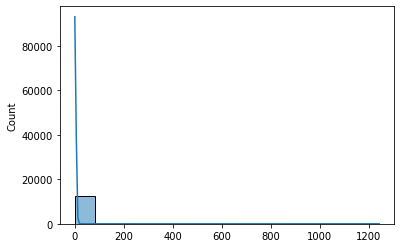

In [100]:
sns.histplot(data=degree, kde=True)

In [101]:
#core decompo = 3 
core = [node for node, drg in dict(g.degree()).items() if drg > 2 ]
degrees = [drg for node, drg in dict(g.degree()).items() if drg > 2 ]

In [102]:
subgraf_g = nx.subgraph(g,core)
print(f'Nodes: {len(subgraf_g)} edges: {nx.number_of_edges(subgraf_g)}')

Nodes: 1338 edges: 5412


In [103]:
import numpy as np
from collections import  Counter

In [104]:
Counter(degrees)

Counter({86: 1,
         555: 1,
         170: 1,
         4: 108,
         128: 1,
         839: 1,
         589: 1,
         131: 1,
         213: 1,
         776: 1,
         862: 1,
         1243: 1,
         438: 1,
         156: 1,
         35: 2,
         57: 2,
         149: 2,
         53: 1,
         14: 2,
         30: 2,
         254: 1,
         464: 1,
         321: 1,
         22: 1,
         43: 1,
         3: 918,
         17: 3,
         117: 1,
         186: 1,
         12: 5,
         462: 1,
         314: 1,
         897: 1,
         594: 1,
         516: 1,
         890: 1,
         23: 2,
         24: 1,
         51: 1,
         93: 1,
         6: 13,
         168: 1,
         238: 1,
         7: 74,
         721: 1,
         250: 1,
         407: 1,
         331: 1,
         20: 2,
         758: 1,
         75: 1,
         21: 1,
         108: 1,
         183: 1,
         137: 1,
         173: 1,
         80: 1,
         363: 1,
         346: 1,
         955: 1,

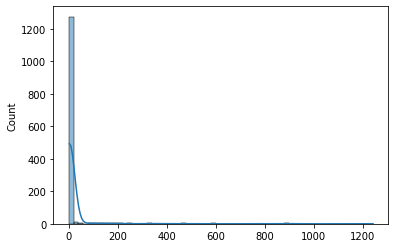

In [105]:
sns.histplot(data=degrees,kde = True,bins=np.histogram_bin_edges(degrees,50,range = (0,1000)))

# degree_centrality

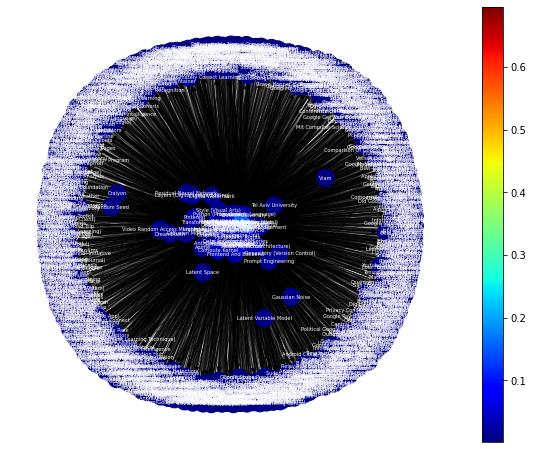

In [106]:
#the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=8375,k=0.2)
# color of nodes
color = list(dict(nx.degree_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white',
                        font_size = 5, 
                        ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

# - Closeness Centrality

In [ ]:
nx.closeness_centrality(g)

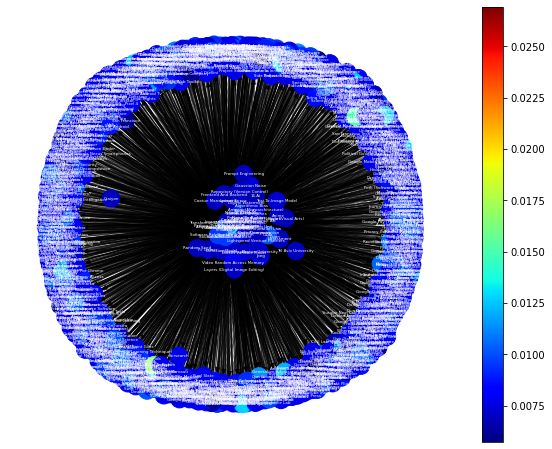

In [108]:

# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.closeness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

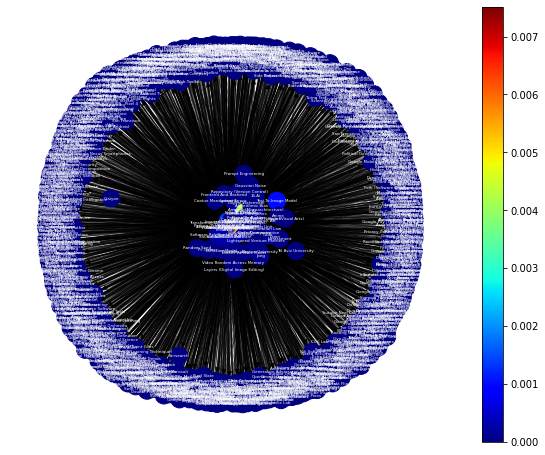

In [109]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

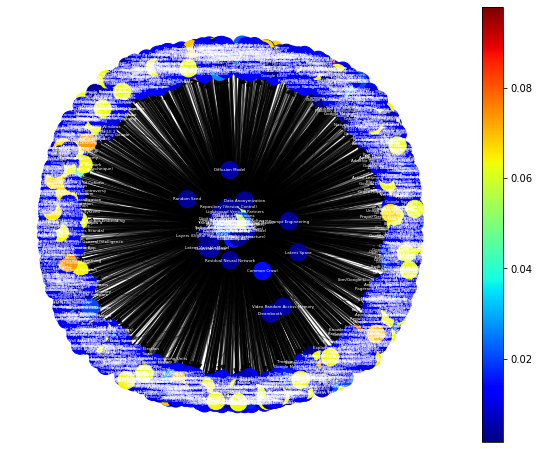

In [110]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.eigenvector_centrality(subgraf_g)).values())

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subgraf_g, pos=pos,
                        font_color='white', ax=ax,font_size = 4)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

In [111]:
import pandas as pd

In [112]:
bc = pd.Series(nx.betweenness_centrality(subgraf_g))
dc = pd.Series(nx.degree_centrality(subgraf_g))
ec = pd.Series(nx.eigenvector_centrality(subgraf_g))
cc = pd.Series(nx.closeness_centrality(subgraf_g))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.0,0.002244,0.012537,0.007779
1,0.0,0.002244,0.012537,0.007779
2,0.0,0.002244,0.012537,0.007779
3,0.0,0.002244,0.012537,0.007779
4,0.0,0.002244,0.012537,0.007779


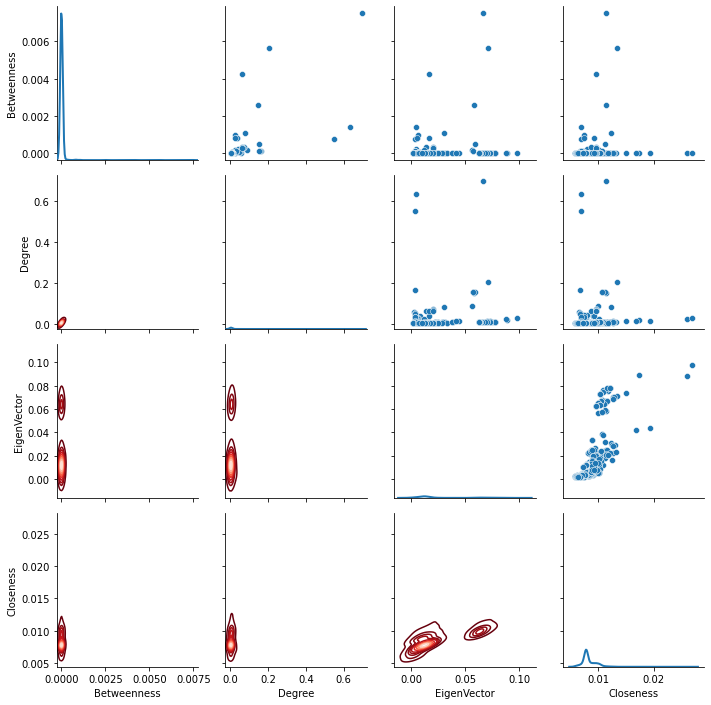

In [114]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)


plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

In [116]:
# How many k-cores does this network have?
set([v for k,v in nx.core_number(subgraf_g).items()])

{3, 4, 5, 6, 7, 8, 9, 10}

In [117]:
import matplotlib.patches as mpatches

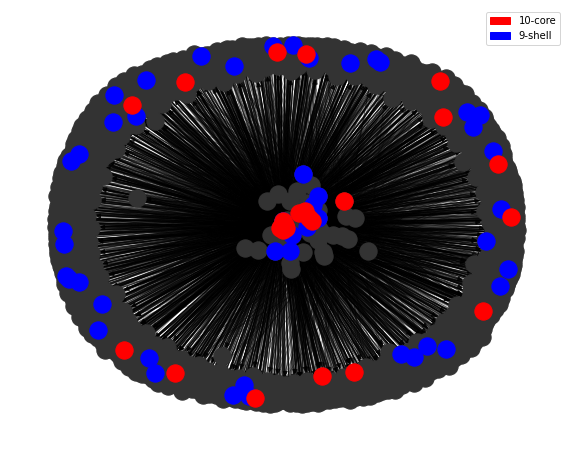

In [120]:
# the degree of network(g2)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g2_core_9 = nx.k_shell(subgraf_g, 9)
g2_core_10 = nx.k_core(subgraf_g, 10)

# layout position
pos = nx.spring_layout(subgraf_g,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(subgraf_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subgraf_g,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g2_core_9,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g2_core_10,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='10-core')
blue_patch = mpatches.Patch(color='blue', label='9-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()

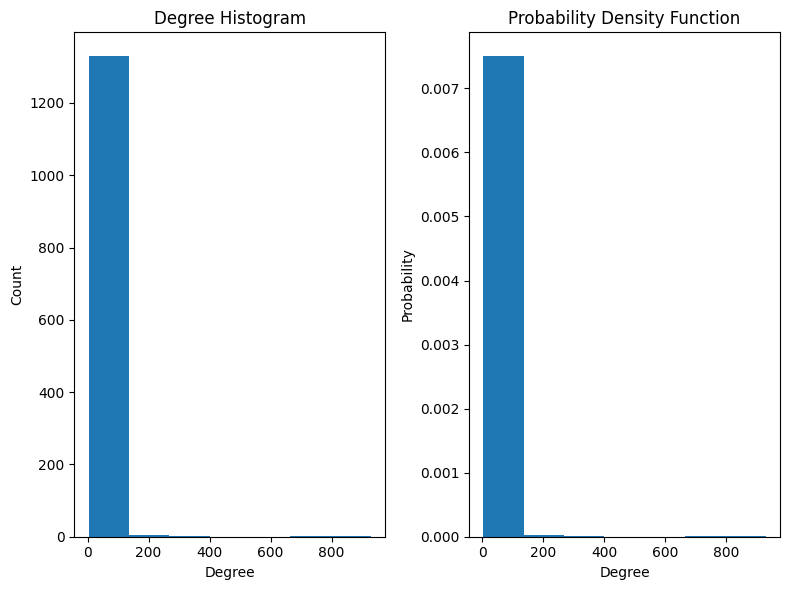

In [121]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in subgraf_g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

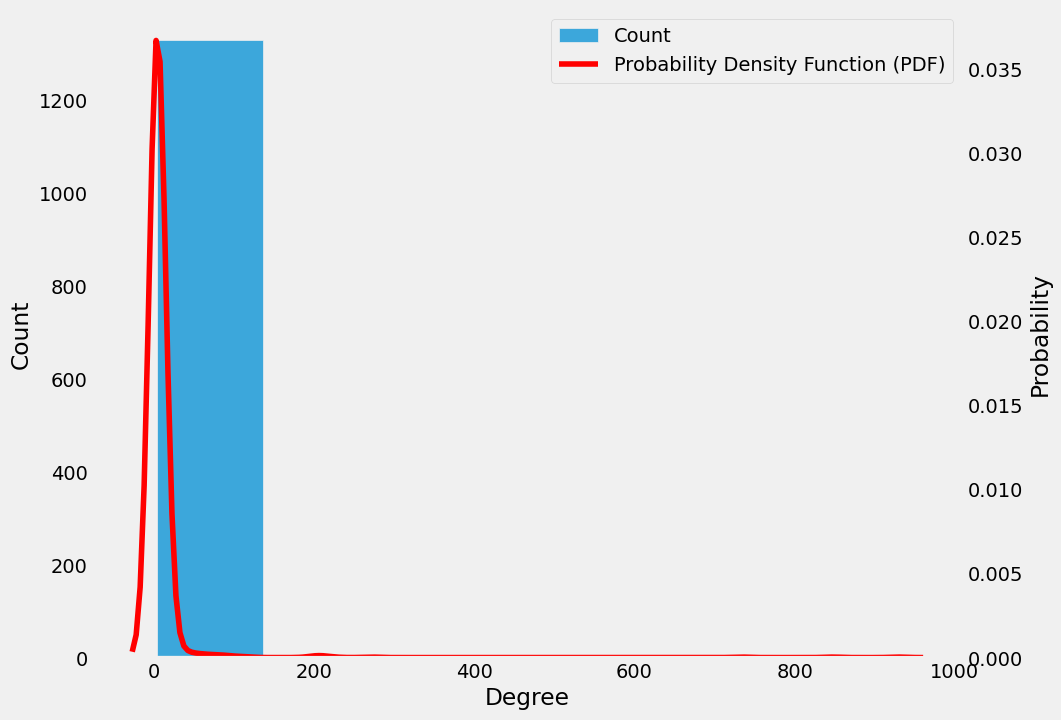

In [122]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

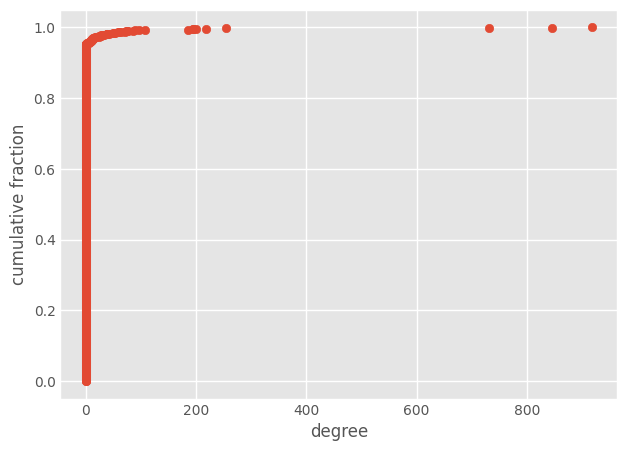

In [124]:
plt.style.use("ggplot")

# Another way to visualize the cumulative distribution
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

def ecdf_degree(G):
    """ECDF of degree."""
    num_neighbors = [len(list(G.neighbors(n))) for n in G.nodes()]
    x, y = ecdf(num_neighbors)
    plt.scatter(x, y)
    plt.xlabel("degree")
    plt.ylabel("cumulative fraction")
     

#
# insighs
# cdf(1) - almore 40% of vertices has degree 1
# cdf(2) P(degree <= 2) - 50% of vertices has at least degree 2 or less
# cdf(6) P(degree <= 6) - more than 95% of vertices has at least degree 6 or less
ecdf_degree(subgraf_g)